In [1]:
%load_ext autoreload
%autoreload 2

Try with **multiple dimension**! 5 or 6

In [2]:
import warnings
warnings.filterwarnings("ignore")

from utils_artificial import gaussian_error_data
import pandas as pd

In [3]:
from pathlib import Path
outfig_dir = "0_output_figures"
Path(outfig_dir).mkdir(parents=True, exist_ok=True)

# Error rate based on a gaussian

In [4]:
min_sups = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

In [5]:

n_attributes = 3
df_analysis, attributes, g, g_sc = gaussian_error_data(n = 10000, n_attributes = n_attributes)

from utils_extract_divergence_generalized_ranking import (
    extract_divergence_generalized,
)



pred_name ="predicted_class"
class_name =  "true_class" 
class_map = {"P":1, "N":0}

continuous_attributes = attributes

min_sup_divergence=0.025

type_experiment = "one_at_time"
metric = "d_error"
type_criterion = "divergence_criterion"


In [6]:
tree_gen_name = "hierarchies gen"

In [7]:
from tree_discretization import TreeDiscretization



import time
max_divergence_dict = {}
time_results = {}

for min_support_tree in min_sups:
    
    print(min_support_tree, end = " ")
    out = {}
    time_results[min_support_tree] = {}
    
    tree_discr = TreeDiscretization()
    
    start_time_tree = time.time()
    generalization_dict, discretizations = tree_discr.get_tree_discretization(
        df_analysis,
        type_splitting=type_experiment,
        min_support=min_support_tree,
        metric=metric,
        continuous_attributes= list(continuous_attributes),
        storeTree=True,
        type_criterion = type_criterion,
        minimal_gain = 0.00,    
        class_map=class_map,
        class_and_pred_names=[class_name, pred_name],
    )    
    time_results[min_support_tree][tree_gen_name] = time.time() - start_time_tree
    

    for apply_generalization in [True, False]:
        if apply_generalization is True:
            type_gen = "generalized"
        else:
            type_gen = "base"
        
        start_time_divergence = time.time()
        FP_fm = extract_divergence_generalized(
            df_analysis,
            discretizations,
            generalization_dict,
            continuous_attributes,
            min_sup_divergence=min_sup_divergence,
            apply_generalization=apply_generalization,
            true_class_name=pred_name,
            predicted_class_name=class_name,
            class_map=class_map,
            FPM_type="fpgrowth",
            metrics_divergence = [metric],
            type_experiment = type_experiment,
            allow_overalp = False if type_experiment!="all_attributes" else True
        )
        time_results[min_support_tree][type_gen] = time.time() - start_time_divergence

        out[type_gen] = max(FP_fm[metric])
    max_divergence_dict[min_support_tree] = out

0.005 0.01 0.02 0.025 0.035 0.05 0.075 0.1 0.125 0.15 0.175 0.2 

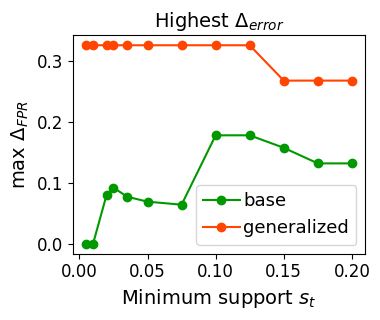

In [8]:
import matplotlib.pyplot as plt

show_sup = [0.005, 0.01, 0.02, 0.025, 0.035, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

n_attributes = 3
vs = {}


fig, ax = plt.subplots(figsize = (4,3.3))

base = { min_support: max_divergence_dict[min_support]["base"] for min_support in max_divergence_dict if min_support in show_sup}
gen =  { min_support: max_divergence_dict[min_support]["generalized"] for min_support in max_divergence_dict if min_support in show_sup}

base = dict(sorted(base.items(), key=lambda item: item[0]))
gen = dict(sorted(gen.items(), key=lambda item: item[0]))


ax.plot(list(base.keys()), list(base.values()), label = "base", marker = "o", c = "#009900")
ax.plot(list(gen.keys()), list(gen.values()), label = "generalized", marker = "o", c = "orangered")
ax.set_title(r"Highest Δ$_{error}$")
ax.set_ylabel(r"max Δ$_{FPR}$")
ax.set_xlabel(r"Minimum support $s_{t}$")
plt.legend( fontsize = 13, handletextpad=0.2)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ): #ax.get_xticklabels()
    item.set_fontsize(14)

for item in ax.get_xticklabels() + ax.get_yticklabels():
     item.set_fontsize(12)


plt.tight_layout();
plt.savefig(f"{outfig_dir}/artificial_gaussian_sensitivity_{n_attributes}_s_{min_sup_divergence}.pdf");

# Time

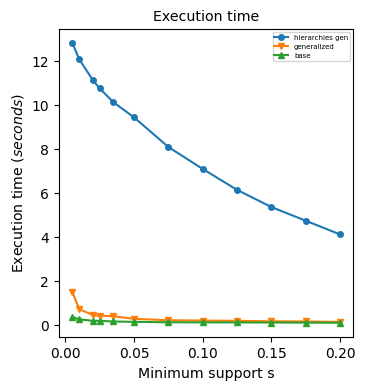

In [9]:
import os
from utils_plot import plotDicts

info_plot = {}

for min_support_tree, res in time_results.items():
    for exp, value in res.items():
        if exp not in info_plot:
            info_plot[exp] = {}
        info_plot[exp][min_support_tree] = value
        
figure_name = os.path.join(outfig_dir, f"artificial_stree_{min_sup_divergence}_{metric}_time_trees.pdf")

size_fig = (3.8,4)
fig = plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Execution time", #yscale="log", 
          xlabel="Minimum support s",  ylabel="Execution time $(seconds)$", labelSize=10.2,
          outside=False,  saveFig=False, nameFig = figure_name)

In [10]:
pd.DataFrame(info_plot)

,hierarchies gen,generalized,base
0.005,12.809469,1.499980,0.353193
0.010,12.062683,0.713044,0.244538
0.020,11.106469,0.437708,0.178447
0.025,10.732318,0.409751,0.178363
0.035,10.102539,0.387235,0.147526
0.050,9.418106,0.266770,0.130661
0.075,8.071988,0.205415,0.112931
0.100,7.076014,0.189065,0.108026
0.125,6.126462,0.178286,0.105339
0.150,5.345088,0.156400,0.099340


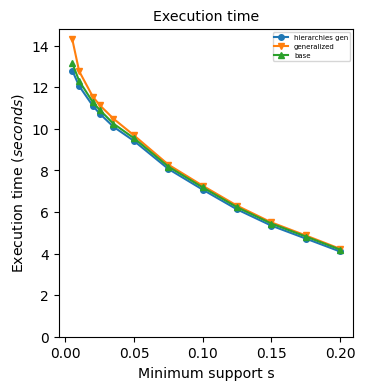

In [11]:
import os
from utils_plot import plotDicts

info_plot = {}

for min_support_tree, res in time_results.items():
    for exp, value in res.items():
        if exp not in info_plot:
            info_plot[exp] = {}
        info_plot[exp][min_support_tree] = value
        
for exp in ["base", "generalized"]:
    for min_support_tree in info_plot[exp]:
        info_plot[exp][min_support_tree] = info_plot[exp][min_support_tree] + info_plot[tree_gen_name][min_support_tree]
        
figure_name = os.path.join(outfig_dir, f"artificial_stree_{min_sup_divergence}_{metric}_time_trees.pdf")

size_fig = (3.8,4)
fig = plotDicts(info_plot, marker=True, \
           sizeFig=size_fig, title="Execution time", #yscale="log", 
          xlabel="Minimum support s",  ylabel="Execution time $(seconds)$", labelSize=10.2,
          outside=False,  saveFig=False, nameFig = figure_name, limit = (0, None))

In [12]:
pd.DataFrame(info_plot)

,hierarchies gen,generalized,base
0.005,12.809469,14.309449,13.162662
0.010,12.062683,12.775726,12.307221
0.020,11.106469,11.544177,11.284916
0.025,10.732318,11.142069,10.910681
0.035,10.102539,10.489774,10.250065
0.050,9.418106,9.684876,9.548768
0.075,8.071988,8.277403,8.184918
0.100,7.076014,7.265079,7.184040
0.125,6.126462,6.304748,6.231800
0.150,5.345088,5.501489,5.444429
